In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from algs_lib import *
from math import comb

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
# plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=True)

In [4]:
fname = 'hybrid_baseline/{}_baselines.pkl'

for data in ['iris', 'rice', 'bean', 'cifar10']:
    print(data, pickle.load(open(fname.format(data), 'rb')))
    print('\n\n')


iris {'kmeans': {True: 0.9167142857142981, False: 0.9180000000000123}, 'svm': {1.0: 0.9591836734693955, 0.05: 0.7142857142857043}, 'dt': {(None, 0, 1.0): 0.9183673469387877, (0.01, 0.2, 0.8): 0.9387755102040937}, 'pca': {1: 0.2060303453624783, 2: 0.10858815750013762}}



rice {'kmeans': {True: 0.916286339754825, False: 0.9180726795096399}, 'svm': {1.0: 0.9316987740805793, 0.05: 0.9308231173380125}, 'dt': {(None, 0, 1.0): 0.9325744308231315, (0.01, 0.35, 0.51): 0.8791593695271682}, 'pca': {1: 0.1849155953315176, 6: 0.0022962300805914066}}



bean {'kmeans': {True: 0.8555868234141543, False: 0.6979877541023779}, 'svm': {1.0: 0.9130541268674809, 0.005: 0.8253734998775232}, 'pca': {1: 0.16837339048944142, 8: 0.007807878351306268}}



cifar10 {'pca': {1: 0.389900738044782, 3: 0.33665230833154924}}





[0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489, 0.9152653061224489]
[0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456, 0.9127005253940456]
[0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398, 0.7180039186872398]


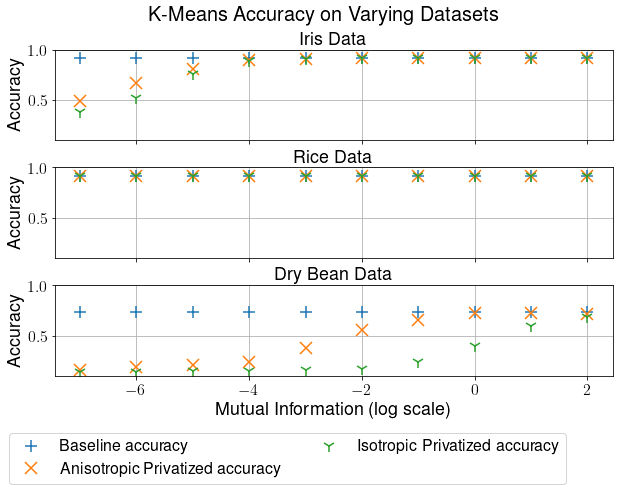

In [7]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["hybrid_kmeans/iris_kmeans_acc_bal=False{ext}.pkl",
          "hybrid_kmeans/rice_kmeans_acc_bal=False{ext}.pkl",
          "hybrid_kmeans/bean_kmeans_acc_bal=False{ext}.pkl"]
iso_fnames = ["hybrid_kmeans/iris_iso_kmeans_acc_bal=False{ext}.pkl",
             "hybrid_kmeans/rice_iso_kmeans_acc_bal=False{ext}.pkl",
             "hybrid_kmeans/bean_iso_kmeans_acc_bal=False{ext}.pkl"]

baseline_vals = [0.9180000000000123, 0.9180726795096399, 0.7314043595395553]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    ext = ''
    hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind].format(ext=ext), 'rb'))
    iso_acc_dict = pickle.load(open(iso_fnames[ind].format(ext=ext), 'rb'))
    ext = '_extended'
    hybrid_acc_dict.update(pickle.load(open(hybrid_fnames[ind].format(ext=ext), 'rb')))
    iso_acc_dict.update(pickle.load(open(iso_fnames[ind].format(ext=ext), 'rb')))
    
    ax = axes[ind]
    sorted_keys = sorted(hybrid_acc_dict.keys())
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
#     ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets", fontsize=20)

plt.savefig('hybrid_figs/mi_kmeans_naive.svg', bbox_inches = "tight")


[0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328, 0.9165102040816328]
[0.48642857142857143, 0.6655714285714286, 0.8214285714285713, 0.903530612244898, 0.9126938775510205, 0.9145102040816327, 0.915795918367347, 0.9156938775510204, 0.9155510204081633, 0.9148979591836734]
[0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516, 0.9120998248686516]
[0.9115683012259194, 0.9119019264448336, 0.9119290718038531, 0.912059544658494, 0.9120315236427321, 0.9120691768826621, 0.9120665499124343, 0.9120875656742558, 0.912098949211909, 0.9120288966725044]
[0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579, 0.8491239284839579

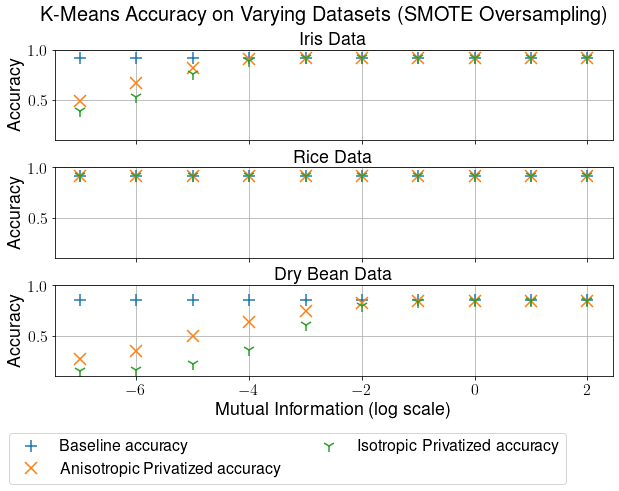

In [8]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["hybrid_kmeans/iris_kmeans_acc_bal=True{ext}.pkl",
          "hybrid_kmeans/rice_kmeans_acc_bal=True{ext}.pkl",
          "hybrid_kmeans/bean_kmeans_acc_bal=True{ext}.pkl"]
iso_fnames = ["hybrid_kmeans/iris_iso_kmeans_acc_bal=True{ext}.pkl",
             "hybrid_kmeans/rice_iso_kmeans_acc_bal=True{ext}.pkl",
             "hybrid_kmeans/bean_iso_kmeans_acc_bal=True{ext}.pkl"]

baseline_vals = [0.916714285714298, 0.916286339754825, 0.8555868234141543]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    ext = ''
    hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind].format(ext=ext), 'rb'))
    iso_acc_dict = pickle.load(open(iso_fnames[ind].format(ext=ext), 'rb'))
    ext = '_extended'
    hybrid_acc_dict.update(pickle.load(open(hybrid_fnames[ind].format(ext=ext), 'rb')))
    iso_acc_dict.update(pickle.load(open(iso_fnames[ind].format(ext=ext), 'rb')))
    ax = axes[ind]
    sorted_keys = sorted(hybrid_acc_dict.keys())
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
#     ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets (SMOTE Oversampling)", fontsize=20)
plt.savefig('hybrid_figs/mi_kmeans_balanced.svg', bbox_inches = "tight")


# SVM

In [22]:
fname = 'hybrid_data/bean_acc_small_mi=0.0625.pkl'
pickle.load(open(fname, 'rb'))

{0.005: (0.7478099436688728, 0.6684871418074942),
 0.01: (0.8091545432280146, 0.5941912809208915)}

[0.34348979591836526, 0.3513061224489774, 0.37567346938775276, 0.40318367346938505, 0.47699999999999837, 0.6030612244897967, 0.7158775510204078, 0.8189795918367393, 0.8827959183673564, 0.9040816326530711]
[0.5219676007005256, 0.5524036777583193, 0.5888572679509655, 0.671625218914186, 0.7770096322241677, 0.8719054290718024, 0.910747810858141, 0.9208931698774048, 0.9249649737302906, 0.9258082311733711]
[0.15754641195199653, 0.15788807249571432, 0.1611075189811417, 0.16074210139603287, 0.16672128337007147, 0.1759946118050461, 0.20120818025961373, 0.25535170217977055, 0.3501969140337989, 0.5065939260347787]


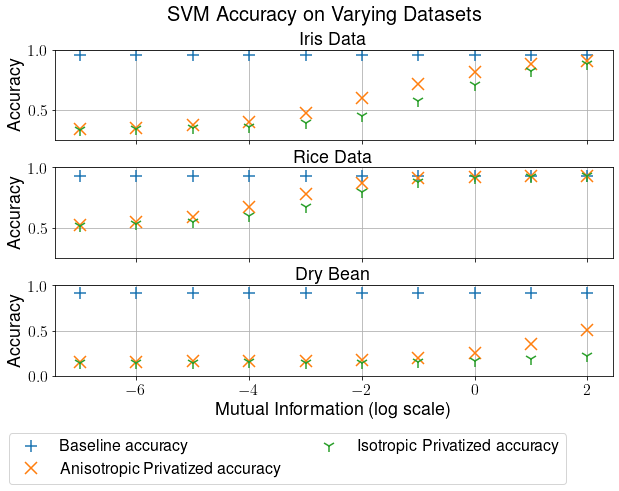

In [9]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
# fnames = ["hybrid_data/iris_acc_mi={}.pkl",
#           "hybrid_data/rice_acc_mi={}.pkl",
#          "hybrid_data/bean_acc_mi={}.pkl"]

# iso_fnames = ["hybrid_data/iris_iso_acc_mi={}.pkl",
#           "hybrid_data/rice_iso_acc_mi={}.pkl",
#              "hybrid_data/bean_iso_acc_mi={}.pkl"]

fnames = ["hybrid_svm/iris_acc_mi={}.pkl",
          "hybrid_svm/rice_acc_mi={}.pkl",
         "hybrid_svm/bean_acc_mi={}.pkl"]

iso_fnames = ["hybrid_svm/iris_iso_acc_mi={}.pkl",
          "hybrid_svm/rice_iso_acc_mi={}.pkl",
             "hybrid_svm/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.9591836734693955, 0.9316987740805793, 0.9130541268674809]




# reg = 0.05
C_vals = [1.0, 1.0, 1.0]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]

for ind, data in enumerate(data_types):

    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_naive.svg', bbox_inches = "tight")


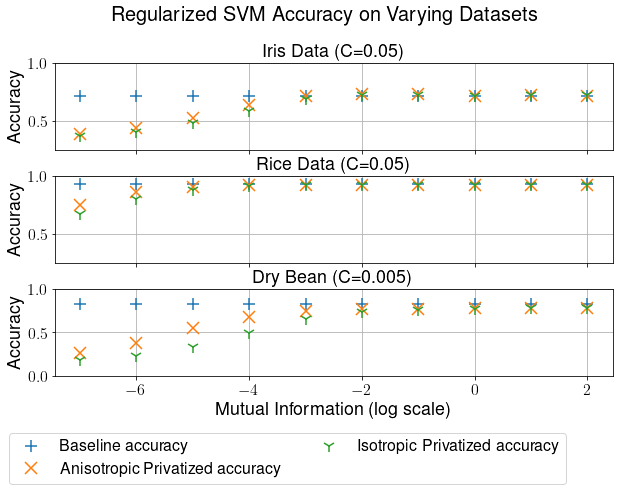

In [10]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
fnames = ["hybrid_svm/iris_acc_mi={}.pkl",
          "hybrid_svm/rice_acc_mi={}.pkl",
         "hybrid_svm/bean_acc_mi={}.pkl"]

iso_fnames = ["hybrid_svm/iris_iso_acc_mi={}.pkl",
          "hybrid_svm/rice_iso_acc_mi={}.pkl",
             "hybrid_svm/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data (C=0.05)", "Rice Data (C=0.05)", "Dry Bean (C=0.005)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.7142857142857043, 0.9308231173380125, 0.8253734998775232]
# reg = 0.05
C_vals = [0.05, 0.05, 0.005]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]
# 

for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_reg.svg', bbox_inches = "tight")


# DT

nonprivate [0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647, 0.9027346938775647]
aniso [0.34448979591836343, 0.3496122448979551, 0.3697959183673433, 0.3979591836734665, 0.47236734693877347, 0.603224489795919, 0.7278775510204097, 0.8154285714285798, 0.8707346938775627, 0.9010000000000136]
nonprivate [0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705, 0.931623467600705]
aniso [0.5404588441330991, 0.5644877408056045, 0.6350411558669005, 0.7357250437828359, 0.8408309982486868, 0.904444833625219, 0.9246068301225928, 0.9296768826620012, 0.9310166374781143, 0.9315788091068351]


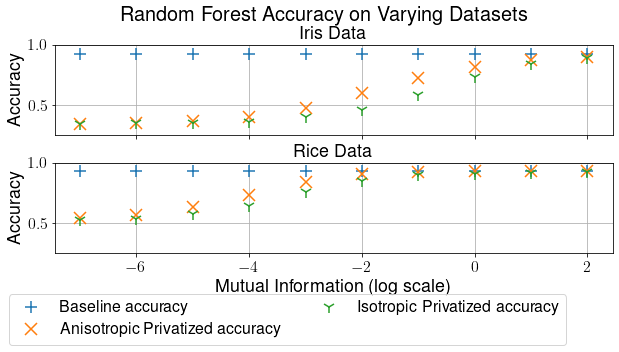

In [11]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0.0, 1.0), (None, 0, 1.0)]
fnames = ["hybrid_dt/iris_acc_auto_reg={}_mi={}.pkl",
          "hybrid_dt/rice_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["hybrid_dt/iris_iso_acc_auto_reg={}_mi={}.pkl",
          "hybrid_dt/rice_iso_acc_auto_reg={}_mi={}.pkl"]
# max precision, reg_param, weight_orig in code; max_precision, weiight_orig, reg_param in text

data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.9183673469387877, 0.9325744308231315]


for ind, data in enumerate(data_types):
#     if ind == 0:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_naive.svg', bbox_inches = "tight")
# hybrid_dt/iris_acc_auto_reg=(None, 0.0, 1.0)_mi=0.015625.pkl

hybrid_dt/iris_iso_acc_auto_reg=(0.01, 0.2, 0.8)_mi=4.0.pkl
nonprivate [0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493, 0.9214489795918493]
aniso [0.4913061224489769, 0.5008163265306108, 0.530918367346938, 0.5890816326530609, 0.654428571428573, 0.7420000000000019, 0.8271428571428642, 0.882591836734705, 0.9164081632653185, 0.9221020408163386]
hybrid_dt/rice_iso_acc_auto_reg=(0.01, 0.35, 0.51)_mi=4.0.pkl
nonprivate [0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015, 0.8892346760070015]
aniso [0.877549036777581, 0.8888108581436034, 0.8892084063047248, 0.889086690017509, 0.8891611208406269, 0.8890647985989456, 0.8892346760070015, 0.8890148861646197, 0.8891619964973692, 0.8891742556917659]


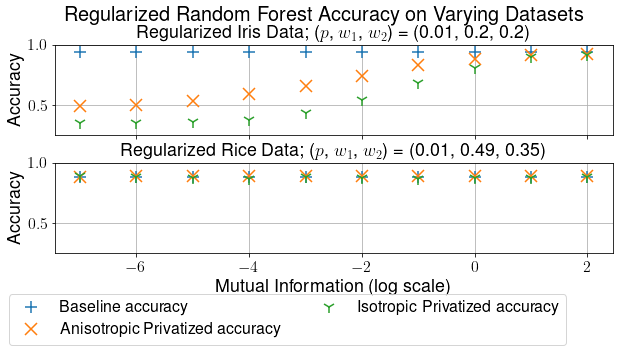

In [12]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(0.01, 0.2, 0.8), (0.01, 0.35, 0.51)]
fnames = ["hybrid_dt/iris_acc_auto_reg={}_mi={}.pkl",
          "hybrid_dt/rice_acc_auto_reg={}_mi={}.pkl"]

iso_fnames = ["hybrid_dt/iris_iso_acc_auto_reg={}_mi={}.pkl",
          "hybrid_dt/rice_iso_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.2, 0.8)_mi=0.015625.pkl

data_types = ['iris', 'rice']
# p, w2, 1-w1
titles = ["Regularized Iris Data; ($p$, $w_1$, $w_2$) = (0.01, 0.2, 0.2)", "Regularized Rice Data; ($p$, $w_1$, $w_2$) = (0.01, 0.49, 0.35)"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.9387755102040937, 0.8791593695271682]

for ind, data in enumerate(data_types):
#     if ind == 0:
#         continue
    print(iso_fnames[ind].format(regs[ind], mi))
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print('nonprivate', subsampling_ys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_reg.svg', bbox_inches = "tight")


# PCA

[0.18208983264277936, 0.18425264963842372, 0.18414555735587837, 0.18413654633561785, 0.184112856237848, 0.18411585955873183, 0.18410639729544534, 0.18411287362725884, 0.1841123950856925, 0.18411402741206392]
[0.17167979328338465, 0.16992804414306656, 0.16954363992737964, 0.16946389491297048, 0.16943000208745726, 0.16942538812442412, 0.16943249885561207, 0.16942603177589943, 0.16942468774007893, 0.16942824247681748]
[0.3927297596350098, 0.39061631437776934, 0.39008602870092896, 0.389953634009611, 0.38992024170661904, 0.3899117960518544, 0.3899099313507203, 0.38990939399385455, 0.3899090427542043, 0.38990890132778067]


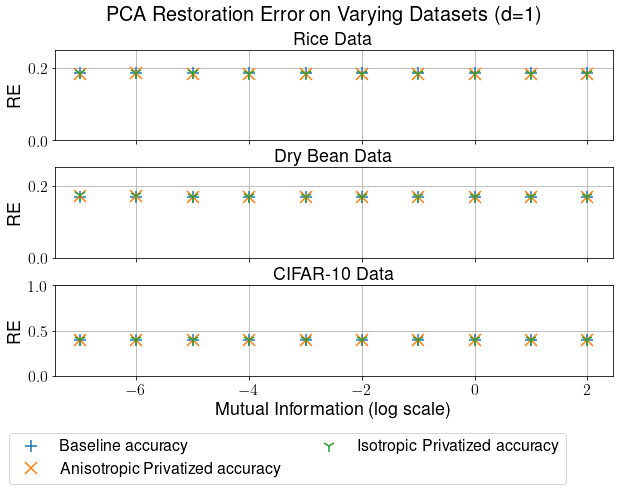

In [13]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# 

fnames = ["hybrid_pca/rice_pca_dist_mi_{}.pkl",
          "hybrid_pca/bean_pca_dist_mi_{}.pkl",
          "hybrid_pca/cifar10_pca_dist_mi_{}.pkl"]

iso_fnames = ["hybrid_pca/rice_iso_pca_dist_mi_{}.pkl",
            "hybrid_pca/bean_iso_pca_dist_mi_{}.pkl",
          "hybrid_pca/cifar10_iso_pca_dist_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR-10 Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.1849155953315176, 0.16837339048944142, 0.389900738044782]

dim = 1
ys = [(0, 0.25), (0, 0.25), (0, 1)]
for ind, data in enumerate(data_types):
#     if ind == 2:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dim]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dim]
    ax = axes[ind]
    acc_dict = {}
#     iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0, 0.6
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (d=1)", fontsize=20)
plt.savefig('hybrid_figs/pca_d=1.svg', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

aniso [0.60653028139447, 0.22436523002138023, 0.09932844141701383, 0.047855611825284736, 0.023699411234091323, 0.012051319053257311, 0.006358753294870005, 0.0037686418455867014, 0.0027753585470651483, 0.0024451723681083136]
iso [2.884734854385482, 0.8726931200790532, 0.3364800849378002, 0.15352680184955775, 0.07479726020800491, 0.0370687465676606, 0.018709530021905358, 0.009563752996887928, 0.0052405718629079286, 0.0032802822209262754]
aniso [1.7496858426371042, 0.5080774445707421, 0.1794416018075068, 0.07861491484259052, 0.03820480642399419, 0.019861169666924756, 0.011966407480913207, 0.008890040115019959, 0.007923156944234974, 0.00766072619354669]
iso [19.361431365476175, 5.074684177505375, 1.4030338932437336, 0.4751390201281954, 0.20616840346254667, 0.09820089839868061, 0.049371630199313433, 0.025248486176499937, 0.014262342789617508, 0.009711194790818736]
aniso [0.5465272020729203, 0.3990301550356701, 0.35325797051792135, 0.3408916145583128, 0.3377296721771673, 0.33693432716668764,

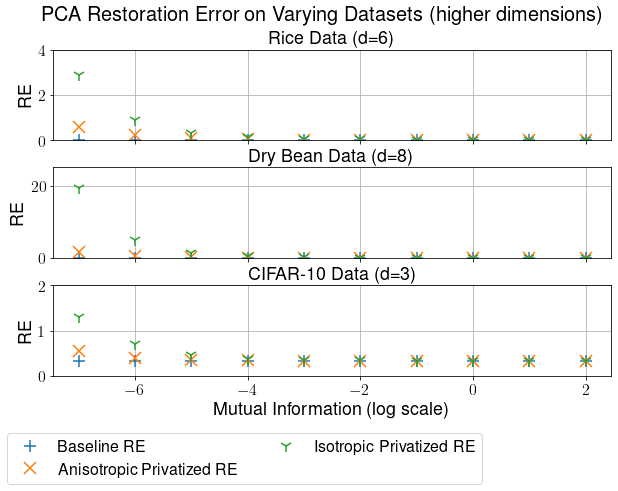

In [14]:
true_x_vals = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# 0.015625, 0.03125, 0.0625, 0.125, 

fnames = ["hybrid_pca/rice_pca_dist_mi_{}.pkl",
          "hybrid_pca/bean_pca_dist_mi_{}.pkl",
          "hybrid_pca/cifar10_pca_dist_mi_{}.pkl"]

iso_fnames = ["hybrid_pca/rice_iso_pca_dist_mi_{}.pkl",
              "hybrid_pca/bean_iso_pca_dist_mi_{}.pkl",
          "hybrid_pca/cifar10_iso_pca_dist_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data (d=6)", "Dry Bean Data (d=8)", "CIFAR-10 Data (d=3)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
ys = [(0, 4), (0, 25), (0, 2)]
baseline_vals = [0.0022962300805914066, 0.007807878351306268, 0.33665230833154924]

dims = [6, 8, 3]
for ind, data in enumerate(data_types):
#     if ind == 2:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dims[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dims[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    print('iso', iso_priv_ys)
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized RE")
    y_min, y_max = 0, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (higher dimensions)", fontsize=20)
plt.savefig('hybrid_figs/pca_higher_dims.svg', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

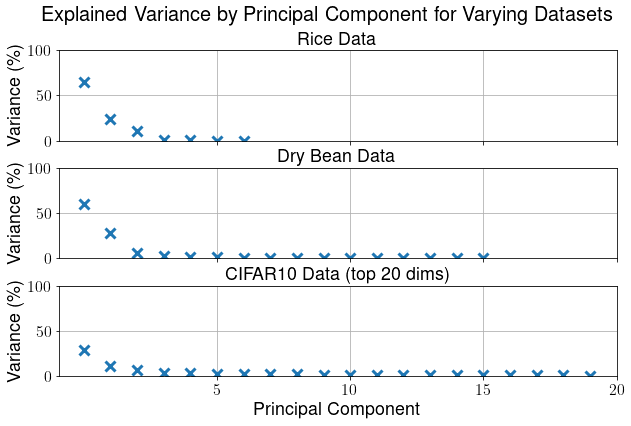

In [15]:
rice_explained_var = [0.6506242290857337, 0.2372633109725393, 0.10945811696346038, 0.0016024579005626536, 0.000758034322984308, 0.00023861549769212874, 5.5235257027472814e-05]
bean_explained_var = [0.6033534165855733, 0.2785851256823293, 0.06122808727678942, 0.024138050359287788, 0.014463903503995752, 0.009719681204229046, 0.006239885715097228, 0.0014478965394851668, 0.0006314652070022946, 9.090695272258236e-05, 7.09415067980201e-05, 1.94233847840926e-05, 1.0441654611948668e-05, 4.7370085481391416e-07, 1.998135295672295e-07, 1.0091290977246153e-07]
cifar10_explained_var = [0.2907662989056515, 0.11253143677034393, 0.06694413963578165, 0.036764588576939025, 0.036088429234138165, 0.028092298273312506, 0.027129920468951633, 0.021671624962741214, 0.020646414039878113, 0.014380014944903246, 0.013105627525556267, 0.010659784252032716, 0.010499812362189248, 0.010042685183294563, 0.00918482261730212, 0.008174001500280186, 0.007396079040473611, 0.007161298663178033, 0.006874716141505839, 0.006432434693362856]
rice_var_pct = [100.*k for k in rice_explained_var]
bean_var_pct = [100.*k for k in bean_explained_var]
cifar10_var_pct = [100.*k for k in cifar10_explained_var]


data_types = ['rice', 'bean', 'cifar10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR10 Data (top 20 dims)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

y_vals = [rice_var_pct, bean_var_pct, cifar10_var_pct]
for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}

    ax.plot(range(len(y_vals[ind])), y_vals[ind], 'x', markersize=10, mew=3.)
    y_min, y_max = 0, 100
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance (\%)", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.set_xticks([5, 10, 15, 20]) 
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Principal Component", fontsize=18)

plt.suptitle("Explained Variance by Principal Component for Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/pca_explained_var.svg', bbox_inches = "tight")

In [17]:
fname = 'hybrid_data/rice_pca_dist_mi_0.015625.pkl'

In [18]:
pickle.load(open(fname, 'rb'))

{1: (0.18416442521360005, 0.1842822735130577),
 6: (0.002347802861951965, 0.2626789570286009)}

In [19]:
fname = 'hybrid_kmeans/iris_ys.pkl'
var_dict = pickle.load(open(fname, 'rb'))

ind = 0

variances = {}
variances['km'] = []
variances[1.0] = []
variances[0.05] = []

for i in range(2, len(var_dict[0])):
    variances['km'].append(np.var(var_dict[0][:i]))

for C in [0.05, 1.0]:
    fname = f'hybrid_svm/iris_svm_C={C}_ys.pkl'
    var_dict[C] = pickle.load(open(fname, 'rb'))

for C in [0.05, 1.0]:
    for i in range(2, len(var_dict[C][0])):
        variances[C].append(np.var(var_dict[C][0][:i]))

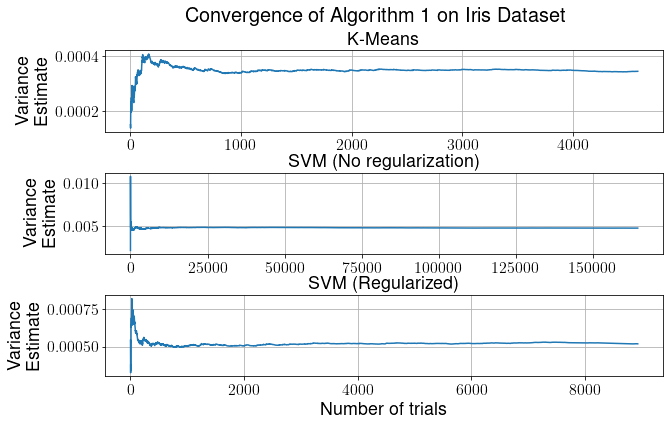

In [20]:
data_types = ['km', 1.0, 0.05]
titles = ["K-Means", "SVM (No regularization)", "SVM (Regularized)"]
fig, axes = plt.subplots(3, figsize=(10, 6))

for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    curr_var_ests = variances[data_types[ind]]

    ax.plot(range(len(curr_var_ests)), curr_var_ests)
#     y_min, y_max = 0, 100
#     ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance\nEstimate", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
    
plt.subplots_adjust(hspace=0.5)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Number of trials", fontsize=18)

plt.suptitle("Convergence of Algorithm 1 on Iris Dataset", fontsize=20)
# plt.show()
plt.savefig('hybrid_figs/alg_convergence.svg', bbox_inches = "tight")

In [231]:
variances.keys()

dict_keys(['km', 1.0, 0.05])

In [21]:
def get_prior_gen_membership(n, k):
#     print(n, k)
    pr = 0.
    for tmp_k in range(k):
        pr += comb(int(n/2.), tmp_k)**2 / comb(n, int(n/2.))
#         print(comb(int(n/2.), tmp_k)**2)
    return 1 - pr

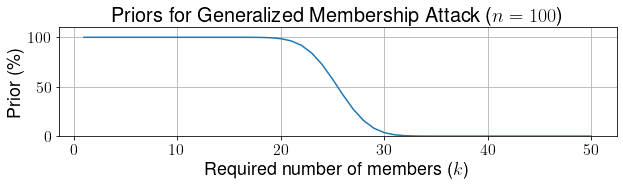

In [22]:
plt.figure(figsize=(10, 2))
n=100

sorted_keys = list(range(1, 51))
priors = [100*get_prior_gen_membership(n, k) for k in sorted_keys]
# print(sorted_noise)
plt.plot(sorted_keys, priors)

y_min, y_max = 0, 110
plt.ylim(y_min, y_max)

plt.ylabel("Prior (\%)", fontsize=18)
plt.xlabel("Required number of members ($k$)", fontsize=18)
# ax.set_title(titles[ind], fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', labelsize=16)
plt.title("Priors for Generalized Membership Attack ($n=100$)", fontsize=20)
plt.savefig('hybrid_figs/gen_member_prior.svg', bbox_inches = "tight")